##Titanic: Machine Learning from Disaster
Kaggle : https://www.kaggle.com/ 에서 회원가입

In [63]:
import pandas as pd
from pandas import Series
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import datasets

In [64]:
train = pd.read_csv('titanic_train.csv')

In [65]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [66]:
train.shape

(891, 12)

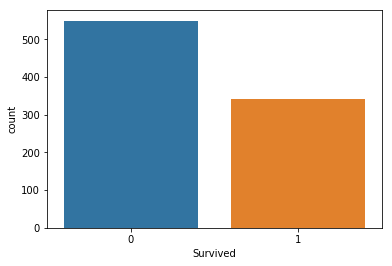

In [67]:
sns.countplot(x="Survived", data=train)
plt.show()

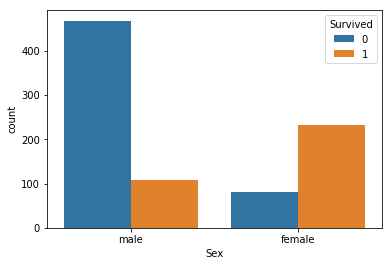

In [68]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.show()

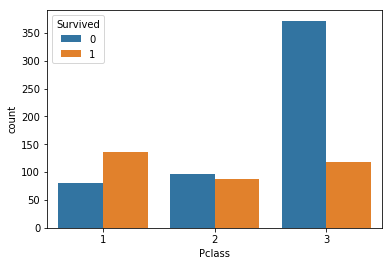

In [69]:
sns.countplot(x="Pclass",hue="Survived", data=train)
plt.show()

In [70]:
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
plt.show()

In [71]:
grid = sns.FacetGrid(train, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

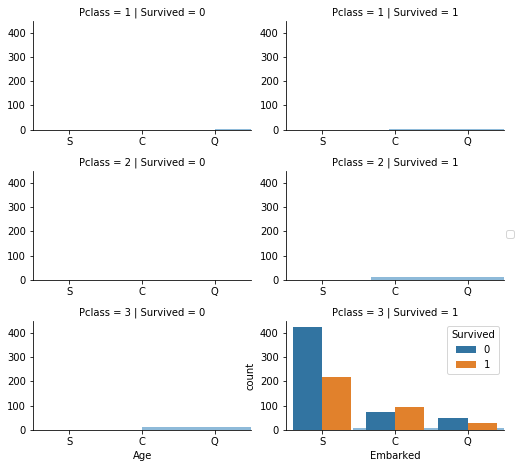

In [72]:
sns.countplot(x="Embarked", hue="Survived", data=train)
plt.show()

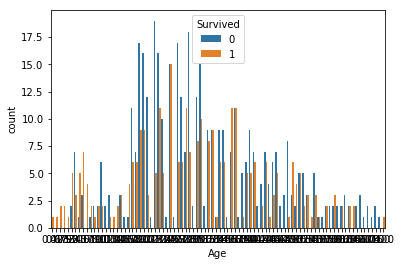

In [73]:
sns.countplot(x="Age", hue="Survived", data=train)
plt.show()

In [74]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
from sklearn.neighbors import KNeighborsClassifier

In [76]:
knn = KNeighborsClassifier(n_neighbors=31)

In [77]:
X_train = train[['Pclass','Sex','Embarked']]
X_train = X_train.fillna('ffill')
Y_train = train.iloc[:,1:2]

In [78]:
X_train.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [79]:
k_list = list(range(1,50))
k_list = list(filter(lambda x: x%2 == 1, k_list))
k_listknn_error = []
knn_score = []

In [80]:
le = LabelEncoder()
X_train.loc[:,'Sex'] = le.fit_transform(X_train['Sex'])

In [81]:
pd.options.mode.chained_assignment = None

SettingWithCopyWarning을 제거하고 싶으면
pd.options.mode.chained_assignment = None
명령 수행

In [82]:
X_train.head()

,Pclass,Sex,Embarked
0,3,1,S
1,1,0,C
2,3,0,S
3,1,0,S
4,3,1,S


In [83]:

X_train.loc[:,'Embarked'] = le.fit_transform(X_train['Embarked'])

In [84]:
X_train.head()

,Pclass,Sex,Embarked
0,3,1,2
1,1,0,0
2,3,0,2
3,1,0,2
4,3,1,2


In [85]:
Y_train.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [86]:
test = pd.read_csv('test.csv')

In [87]:
X_test = test[['Pclass','Sex','Embarked']]
X_test.loc[:,'Embarked'] = le.fit_transform(X_test['Embarked'])
X_test.loc[:,'Sex'] = le.fit_transform(X_test['Sex'])
knn.fit(X_train, Y_train.values.ravel())

test.info()
X_train.info()
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
Pclass      891 non-null int64
Sex         891 non-null int64
Embarked    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.0 KB


In [88]:
from sklearn.model_selection import cross_val_score
knn_error = []
knn_score = []
for k in k_list:
    knn_cv = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn_cv, X_train, Y_train.values.ravel(), cv=10, scoring='accuracy')
    print(scores.mean())
    knn_score.append(scores.mean())
    knn_error.append(1-scores.mean())
knn_score

0.6877142208602882
0.740755873340143
0.7867109295199183
0.7968232890704801
0.7856497559868345
0.7890205425036885
0.7822287481557144
0.7912175122006582
0.7900939166950403
0.7990826807399841
0.8057992849846782
0.8057992849846782
0.8069228804902963
0.8069228804902963
0.8069228804902963
0.8114683350357508
0.8114683350357508
0.8114683350357508
0.8114683350357508
0.8114683350357508
0.8114683350357508
0.8036905572579729
0.7991961752355011
0.8003197707411192
0.8003197707411192


[0.6877142208602882,
 0.740755873340143,
 0.7867109295199183,
 0.7968232890704801,
 0.7856497559868345,
 0.7890205425036885,
 0.7822287481557144,
 0.7912175122006582,
 0.7900939166950403,
 0.7990826807399841,
 0.8057992849846782,
 0.8057992849846782,
 0.8069228804902963,
 0.8069228804902963,
 0.8069228804902963,
 0.8114683350357508,
 0.8114683350357508,
 0.8114683350357508,
 0.8114683350357508,
 0.8114683350357508,
 0.8114683350357508,
 0.8036905572579729,
 0.7991961752355011,
 0.8003197707411192,
 0.8003197707411192]

In [89]:
max(knn_score)

0.8114683350357508

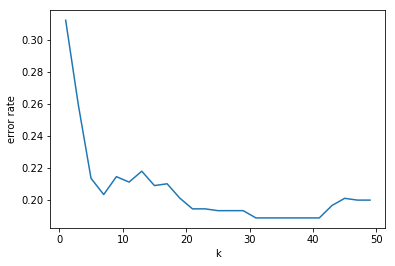

31

In [90]:
import matplotlib.pyplot as plt
plt.plot(k_list, knn_error)
plt.xlabel('k')
plt.ylabel('error rate')
plt.show()
k_optimal = k_list[knn_error.index(min(knn_error))]
k_optimal

In [91]:
X_test.head()

,Pclass,Sex,Embarked
0,3,1,1
1,3,0,2
2,2,1,1
3,3,1,2
4,3,0,2


In [92]:
Y = knn.predict(X_test)

In [93]:
with open("result.csv", "w") as f:
    f.write('PassengerId,Survived\n')
    for i in range(len(X_test)):
        f.write(str(test.loc[i][0])+','+str(Y[i])+'\n')